# Name - OLADEJI JOSHUA AKINTAYO

# KPMG VIRTUAL INTERNSHIP PROJECT

### The Innovation and Digital Solutions Division

- KPMG’s Analytics, Information & Modelling group helps organisations take the mystery out of big data and show them how to leverage their data resources to produce better business outcomes.

### TASK: 1 - Data Quality Assessment
 - Assessment of data quality and completeness in preparation for analysis.
 
### TASK: 2 - Data Insights
 - Targeting high value customers based on customer demographics and attributes.

### TASK: 3 - Data Insights and Presentation
 - Using Visualisations to present insights.

### Background information on task - 
 
 - `**Sprocket Central Pty Ltd**` , a medium size bikes & cycling accessories organisation, has approached Tony Smith (Partner) in KPMG’s Lighthouse & Innovation Team. Sprocket Central Pty Ltd  is keen to learn more about KPMG’s expertise in its Analytics, Information & Modelling team. 
 
 
#### The client provided KPMG with 3 datasets:
 
 - `**1.Customer Demographic**`
 
 - `**2.Customer Addresses**`
 
 - `**3.Transactions data in the past 3 months**`
 
### Objective

 1. To, review the data quality to ensure that it is ready for our analysis. Remember to take note of any assumptions or issues we need to go back to the client on. As well as recommendations going forward to mitigate current data quality concerns.
 
 2. Prepare a detailed approach for completing the analysis including activities – i.e. understanding the data distributions, feature engineering, data transformations, modelling, results interpretation and reporting. This detailed plan needs to be presented to the client to get a sign-off. Please advise what steps you would take. 
    - Please ensure your PowerPoint presentation includes a detailed approach for our strategy behind each of the 3 phases including activities involved in each - i.e. understanding the data distributions, feature engineering, data transformations, modelling, results interpretation and reporting. This detailed plan needs to be presented to the client to get a sign-off.
    
 3. Please develop a dashboard that we can present to the client at our next meeting. Display your data summary and results of the analysis in a dashboard. Maximum of 3 dashboard views/tabs, creativity in layout and presentation is welcome. please find attached a client logo for incorporation.
    - Specifically, your presentation should specify who Sprocket Central Pty Ltd’s marketing team should be targeting out of the new 1000 customer list as well as the broader market segment to reach out to. 


## Resources to help you with the task

### Data Quality Framework Table

 - Below is a list of the Data Quality dimensions our team may use to evaluate a dataset. Some of these terms are common to the whole industry, so you may find more information and clarity on these terms by searching online.


In [221]:
# Filtering out the warnings
import warnings

warnings.filterwarnings('ignore')

In [2]:
# Importing the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Reading The Data

In [3]:
from pandas import ExcelWriter
from pandas import ExcelFile

In [32]:
filepath = "C:\\Users\\OlamiTayo\\Documents\\Data Analyst\\KPMG Virtual Internship\\new_KPMG.xlsx"
transactions = pd.read_excel(filepath, sheet_name='Transactions')
customer_demographic = pd.read_excel(filepath, sheet_name='CustomerDemographic')
customer_add = pd.read_excel(filepath, sheet_name='CustomerAddress')
new_customer_lists = pd.read_excel(filepath, sheet_name='NewCustomerList')

## Exploring the Transactions Dataset

In [33]:
transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,253,2,3123,2017-12-30,False,Approved,Giant Bicycles,Road,low,small,590.26,525.33,2010-11-05
1,411,62,3355,2017-12-30,False,Approved,Solex,Standard,medium,medium,478.16,298.72,1993-06-23
2,497,62,1854,2017-12-30,True,Approved,Solex,Standard,high,medium,1024.66,614.80,1993-10-02
3,606,70,2878,2017-12-30,False,Approved,Trek Bicycles,Standard,high,medium,495.72,297.43,1999-07-26
4,748,80,2865,2017-12-30,True,Approved,Trek Bicycles,Standard,medium,large,1469.44,596.55,2012-05-18


In [34]:
transactions1 = transactions.dropna(axis=1)
transactions1.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,253,2,3123,2017-12-30,False,Approved,Giant Bicycles,Road,low,small,590.26,525.33,2010-11-05
1,411,62,3355,2017-12-30,False,Approved,Solex,Standard,medium,medium,478.16,298.72,1993-06-23
2,497,62,1854,2017-12-30,True,Approved,Solex,Standard,high,medium,1024.66,614.80,1993-10-02
3,606,70,2878,2017-12-30,False,Approved,Trek Bicycles,Standard,high,medium,495.72,297.43,1999-07-26
4,748,80,2865,2017-12-30,True,Approved,Trek Bicycles,Standard,medium,large,1469.44,596.55,2012-05-18


In [35]:
transactions1.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,253,2,3123,2017-12-30,False,Approved,Giant Bicycles,Road,low,small,590.26,525.33,2010-11-05
1,411,62,3355,2017-12-30,False,Approved,Solex,Standard,medium,medium,478.16,298.72,1993-06-23
2,497,62,1854,2017-12-30,True,Approved,Solex,Standard,high,medium,1024.66,614.80,1993-10-02
3,606,70,2878,2017-12-30,False,Approved,Trek Bicycles,Standard,high,medium,495.72,297.43,1999-07-26
4,748,80,2865,2017-12-30,True,Approved,Trek Bicycles,Standard,medium,large,1469.44,596.55,2012-05-18


In [36]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19445 entries, 0 to 19444
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19445 non-null  int64         
 1   product_id               19445 non-null  int64         
 2   customer_id              19445 non-null  int64         
 3   transaction_date         19445 non-null  datetime64[ns]
 4   online_order             19445 non-null  bool          
 5   order_status             19445 non-null  object        
 6   brand                    19445 non-null  object        
 7   product_line             19445 non-null  object        
 8   product_class            19445 non-null  object        
 9   product_size             19445 non-null  object        
 10  list_price               19445 non-null  float64       
 11  standard_cost            19445 non-null  float64       
 12  product_first_sold_date  19445 n

In [37]:
print("Rows : ", transactions.shape[0])
print("Columns : ", transactions.shape[1])

Rows :  19445
Columns :  13


In [38]:
transactions.describe()

,transaction_id,product_id,customer_id,list_price,standard_cost
count,19445.000000,19445.000000,19445.000000,19445.000000,19445.000000
mean,9989.257393,45.797737,1739.467267,1107.337193,555.585260
std,5779.669087,30.571996,1011.889153,582.662400,405.596541
min,1.000000,0.000000,1.000000,12.010000,7.210000
25%,4976.000000,18.000000,857.000000,575.270000,215.140000
50%,9985.000000,45.000000,1741.000000,1163.890000,507.580000
75%,14997.000000,72.000000,2615.000000,1635.300000,795.100000
max,20000.000000,100.000000,5034.000000,2091.470000,1759.850000


In [39]:
#convert date columns from integer to datetime
transactions['product_first_sold_date'] = pd.to_datetime(transactions['product_first_sold_date'], unit='s')
transactions['product_first_sold_date'].head()

0   2010-11-05
1   1993-06-23
2   1993-10-02
3   1999-07-26
4   2012-05-18
Name: product_first_sold_date, dtype: datetime64[ns]

#### Note - 

- The values in the `**product_first_sold_date**` columns are not correct as it shows everything happening the same day at different times. We would need to refer back to the author of the data to seek more clasrification on how the data was collected.

In [40]:
transactions.isnull().values.any()

False

In [41]:
transactions.isnull().sum()

transaction_id             0
product_id                 0
customer_id                0
transaction_date           0
online_order               0
order_status               0
brand                      0
product_line               0
product_class              0
product_size               0
list_price                 0
standard_cost              0
product_first_sold_date    0
dtype: int64

**We can decide to drop missing values depending on the objective of our analysis.**

In [42]:
transactions = transactions[-transactions["online_order"].isnull()]
transactions = transactions[-transactions["brand"].isnull()]
transactions = transactions[-transactions["product_line"].isnull()]
transactions = transactions[-transactions["product_class"].isnull()]
transactions = transactions[-transactions["product_size"].isnull()]
transactions = transactions[-transactions["standard_cost"].isnull()]
transactions = transactions[-transactions["product_first_sold_date"].isnull()]
transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19445 entries, 0 to 19444
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19445 non-null  int64         
 1   product_id               19445 non-null  int64         
 2   customer_id              19445 non-null  int64         
 3   transaction_date         19445 non-null  datetime64[ns]
 4   online_order             19445 non-null  bool          
 5   order_status             19445 non-null  object        
 6   brand                    19445 non-null  object        
 7   product_line             19445 non-null  object        
 8   product_class            19445 non-null  object        
 9   product_size             19445 non-null  object        
 10  list_price               19445 non-null  float64       
 11  standard_cost            19445 non-null  float64       
 12  product_first_sold_date  19445 n

In [43]:
transactions.nunique() #to check for unique values

transaction_id             19445
product_id                   101
customer_id                 3492
transaction_date             364
online_order                   2
order_status                   2
brand                          6
product_line                   4
product_class                  3
product_size                   3
list_price                   100
standard_cost                101
product_first_sold_date      100
dtype: int64

In [44]:
transactions[transactions.duplicated()]  #to check for duplicate values

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date


In [45]:
transactions.duplicated().sum()

0

In [46]:
transactions.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date'],
      dtype='object')

In [47]:
transactions["product_line"].value_counts()

Standard    13920
Road         3894
Touring      1213
Mountain      418
Name: product_line, dtype: int64

In [48]:
transactions["order_status"].value_counts()

Approved     19273
Cancelled      172
Name: order_status, dtype: int64

In [49]:
transactions["product_class"].value_counts()

medium    13587
high       2952
low        2906
Name: product_class, dtype: int64

In [50]:
transactions["product_size"].value_counts()

medium    12767
large      3900
small      2778
Name: product_size, dtype: int64

In [51]:
transactions["brand"].value_counts()

Solex             4169
WeareA2B          3245
Giant Bicycles    3244
OHM Cycles        2993
Trek Bicycles     2931
Norco Bicycles    2863
Name: brand, dtype: int64

In [52]:
transactions["online_order"].value_counts()

True     9739
False    9706
Name: online_order, dtype: int64

**All the columns appear to have consistent and correct information.**

In [53]:
# will add "profit" column. Formulae = List price - Standard Cost
transactions["profit"] = transactions["list_price"] - transactions["standard_cost"]

In [54]:
transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,profit
0,253,2,3123,2017-12-30,False,Approved,Giant Bicycles,Road,low,small,590.26,525.33,2010-11-05,64.93
1,411,62,3355,2017-12-30,False,Approved,Solex,Standard,medium,medium,478.16,298.72,1993-06-23,179.44
2,497,62,1854,2017-12-30,True,Approved,Solex,Standard,high,medium,1024.66,614.80,1993-10-02,409.86
3,606,70,2878,2017-12-30,False,Approved,Trek Bicycles,Standard,high,medium,495.72,297.43,1999-07-26,198.29
4,748,80,2865,2017-12-30,True,Approved,Trek Bicycles,Standard,medium,large,1469.44,596.55,2012-05-18,872.89


In [55]:
transactions.isnull().values.any()

False

------------------------------------------------------------------------------------------------------------------------------

## Exploring Customer Demographic Data Set

In [56]:
customer_demographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Total Years
0,720,Darrel,Canet,Male,67,1931-10-23,Recruiting Manager,Retail,Affluent Customer,N,No,6,90.019178
1,1092,Katlin,Creddon,Female,56,1935-08-22,VP Quality Control,Retail,Mass Customer,N,No,5,86.186301
2,2413,Abbey,Murrow,Male,27,1943-08-11,Environmental Specialist,Manufacturing,High Net Worth,N,Yes,17,78.210959
3,658,Donn,Bonnell,Male,38,1944-01-24,Tax Accountant,Manufacturing,Affluent Customer,N,Yes,8,77.756164
4,1243,Robbert,Blakey,Male,73,1953-08-09,Research Assistant II,Retail,Mass Customer,N,No,8,68.208219


In [57]:
#customer_demographic.drop("default", axis=1, inplace=True)
#customer_demographic.head()

In [58]:
customer_demographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3310 entries, 0 to 3309
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          3310 non-null   int64         
 1   first_name                           3310 non-null   object        
 2   last_name                            3310 non-null   object        
 3   gender                               3310 non-null   object        
 4   past_3_years_bike_related_purchases  3310 non-null   int64         
 5   DOB                                  3310 non-null   datetime64[ns]
 6   job_title                            3310 non-null   object        
 7   job_industry_category                2779 non-null   object        
 8   wealth_segment                       3310 non-null   object        
 9   deceased_indicator                   3310 non-null   object        
 10  owns_car    

In [59]:
print("Rows : ", customer_demographic.shape[0])
print("Columns : ", customer_demographic.shape[1])

Rows :  3310
Columns :  13


In [60]:
customer_demographic.describe()

,customer_id,past_3_years_bike_related_purchases,tenure,Total Years
count,3310.000000,3310.000000,3310.000000,3310.000000
mean,1977.929607,49.416918,10.654985,44.228133
std,1149.523496,28.824259,5.656373,12.562660
min,1.000000,0.000000,1.000000,19.589041
25%,990.250000,24.250000,6.000000,34.811644
50%,1973.500000,49.000000,11.000000,44.176712
75%,2956.750000,74.000000,15.000000,53.495890
max,4000.000000,99.000000,22.000000,90.019178


In [61]:
customer_demographic.isnull().sum()

customer_id                              0
first_name                               0
last_name                                0
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                      0
job_title                                0
job_industry_category                  531
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
Total Years                              0
dtype: int64

**We can decide to drop missing values depending on the objective of our analysis.**

 -  Not droping the null values present in Last Name Column as the concerend row has first name which is more than sufficient

In [62]:
customer_demographic.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'Total Years'],
      dtype='object')

In [63]:
customer_demographic = customer_demographic[-customer_demographic["DOB"].isnull()]
customer_demographic = customer_demographic[-customer_demographic["job_title"].isnull()]
customer_demographic = customer_demographic[-customer_demographic["job_industry_category"].isnull()]
customer_demographic = customer_demographic[-customer_demographic["tenure"].isnull()]
customer_demographic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2779 entries, 0 to 3309
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          2779 non-null   int64         
 1   first_name                           2779 non-null   object        
 2   last_name                            2779 non-null   object        
 3   gender                               2779 non-null   object        
 4   past_3_years_bike_related_purchases  2779 non-null   int64         
 5   DOB                                  2779 non-null   datetime64[ns]
 6   job_title                            2779 non-null   object        
 7   job_industry_category                2779 non-null   object        
 8   wealth_segment                       2779 non-null   object        
 9   deceased_indicator                   2779 non-null   object        
 10  owns_car    

In [64]:
customer_demographic.nunique()

customer_id                            2779
first_name                             2335
last_name                              2706
gender                                    2
past_3_years_bike_related_purchases     100
DOB                                    2537
job_title                               195
job_industry_category                     9
wealth_segment                            3
deceased_indicator                        2
owns_car                                  2
tenure                                   22
Total Years                            2537
dtype: int64

In [65]:
#Gender

customer_demographic.gender.unique()

array(['Male', 'Female'], dtype=object)

In [66]:
customer_demographic["gender"] = customer_demographic["gender"].replace(["F","Femal"],"Female")
customer_demographic["gender"] = customer_demographic["gender"].replace(["U"],"Undefined")

customer_demographic.gender.unique()

array(['Male', 'Female'], dtype=object)

In [67]:
customer_demographic.gender.value_counts()

Female    1446
Male      1333
Name: gender, dtype: int64

In [68]:
#Age
customer_demographic.DOB

0      1931-10-23
1      1935-08-22
2      1943-08-11
3      1944-01-24
4      1953-08-09
          ...    
3303   2001-12-19
3304   2001-12-19
3305   2002-01-01
3308   2002-01-26
3309   2002-03-11
Name: DOB, Length: 2779, dtype: datetime64[ns]

In [74]:
customer_demographic['year'] = pd.DatetimeIndex(customer_demographic['DOB']).year
customer_demographic['month'] = pd.DatetimeIndex(customer_demographic['DOB']).month

customer_demographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Total Years,year,month,age
0,720,Darrel,Canet,Male,67,1931-10-23,Recruiting Manager,Retail,Affluent Customer,N,No,6,90.019178,1931,10,90
1,1092,Katlin,Creddon,Female,56,1935-08-22,VP Quality Control,Retail,Mass Customer,N,No,5,86.186301,1935,8,86
2,2413,Abbey,Murrow,Male,27,1943-08-11,Environmental Specialist,Manufacturing,High Net Worth,N,Yes,17,78.210959,1943,8,78
3,658,Donn,Bonnell,Male,38,1944-01-24,Tax Accountant,Manufacturing,Affluent Customer,N,Yes,8,77.756164,1944,1,77
4,1243,Robbert,Blakey,Male,73,1953-08-09,Research Assistant II,Retail,Mass Customer,N,No,8,68.208219,1953,8,68


In [75]:
customer_demographic['age'] = 2021- customer_demographic['year']
customer_demographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Total Years,year,month,age
0,720,Darrel,Canet,Male,67,1931-10-23,Recruiting Manager,Retail,Affluent Customer,N,No,6,90.019178,1931,10,90
1,1092,Katlin,Creddon,Female,56,1935-08-22,VP Quality Control,Retail,Mass Customer,N,No,5,86.186301,1935,8,86
2,2413,Abbey,Murrow,Male,27,1943-08-11,Environmental Specialist,Manufacturing,High Net Worth,N,Yes,17,78.210959,1943,8,78
3,658,Donn,Bonnell,Male,38,1944-01-24,Tax Accountant,Manufacturing,Affluent Customer,N,Yes,8,77.756164,1944,1,77
4,1243,Robbert,Blakey,Male,73,1953-08-09,Research Assistant II,Retail,Mass Customer,N,No,8,68.208219,1953,8,68


In [76]:
customer_demographic[customer_demographic['age'] >= 90]


,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Total Years,year,month,age
0,720,Darrel,Canet,Male,67,1931-10-23,Recruiting Manager,Retail,Affluent Customer,N,No,6,90.019178,1931,10,90


#### Note-
`**customer_id - 34**` : Age is coming `**178**` which is not a correct age hence will drop this value.

In [77]:
#customer_demographic.drop(33, inplace = True) 

In [78]:
#customer_demographic[customer_demographic['age'] >= 90]

In [79]:
customer_demographic.gender.value_counts()

Female    1445
Male      1333
Name: gender, dtype: int64

In [80]:
customer_demographic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2778 entries, 0 to 3309
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          2778 non-null   int64         
 1   first_name                           2778 non-null   object        
 2   last_name                            2778 non-null   object        
 3   gender                               2778 non-null   object        
 4   past_3_years_bike_related_purchases  2778 non-null   int64         
 5   DOB                                  2778 non-null   datetime64[ns]
 6   job_title                            2778 non-null   object        
 7   job_industry_category                2778 non-null   object        
 8   wealth_segment                       2778 non-null   object        
 9   deceased_indicator                   2778 non-null   object        
 10  owns_car    

In [81]:
customer_demographic["job_title"].value_counts()

Social Worker                   42
Sales Representative            37
Desktop Support Technician      35
Dental Hygienist                35
Chemical Engineer               35
                                ..
Programmer Analyst IV            2
Research Assistant III           2
Human Resources Assistant IV     2
Developer I                      1
Database Administrator II        1
Name: job_title, Length: 195, dtype: int64

In [82]:
customer_demographic["job_industry_category"].value_counts()

Manufacturing         670
Financial Services    661
Health                529
Retail                296
Property              229
IT                    123
Entertainment         116
Argiculture            97
Telecommunications     57
Name: job_industry_category, dtype: int64

In [83]:
customer_demographic["wealth_segment"].value_counts()

Mass Customer        1383
High Net Worth        710
Affluent Customer     685
Name: wealth_segment, dtype: int64

In [84]:
customer_demographic["owns_car"].value_counts()

Yes    1421
No     1357
Name: owns_car, dtype: int64

## Exploring Customer Address Data Type

In [85]:
customer_add.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [86]:
customer_add.isnull().values.any()

False

In [87]:
customer_add.nunique()

customer_id           3999
address               3996
postcode               873
state                    3
country                  1
property_valuation      12
dtype: int64

In [88]:
customer_add["state"].value_counts()

NSW    2140
VIC    1021
QLD     838
Name: state, dtype: int64

In [90]:
#customer_add["state"] = customer_add["state"].replace(["NSW"],"New South Wales")
#customer_add["state"] = customer_add["state"].replace(["VIC"],"Victoria")
#customer_add["state"].value_counts()

In [91]:
customer_add.country.value_counts()

Australia    3999
Name: country, dtype: int64

## Exploring New Customer List Dataset

In [92]:
new_customer_lists.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Column17,Column18,Column19,Column20,Column21,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.56,0.7000,0.8750,0.743750,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.89,0.8900,1.1125,0.945625,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,1.01,1.0100,1.0100,1.010000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.87,1.0875,1.0875,1.087500,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.52,0.5200,0.6500,0.650000,4,4,1.703125


In [93]:
new_customer_lists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           878 non-null    object        
 1   last_name                            852 non-null    object        
 2   gender                               878 non-null    object        
 3   past_3_years_bike_related_purchases  878 non-null    int64         
 4   DOB                                  878 non-null    datetime64[ns]
 5   job_title                            878 non-null    object        
 6   job_industry_category                735 non-null    object        
 7   wealth_segment                       878 non-null    object        
 8   deceased_indicator                   878 non-null    object        
 9   owns_car                             878 non-null    object        
 10  tenure        

In [94]:
new_customer_lists.nunique()

first_name                             831
last_name                              845
gender                                   2
past_3_years_bike_related_purchases    100
DOB                                    856
job_title                              184
job_industry_category                    9
wealth_segment                           3
deceased_indicator                       1
owns_car                                 2
tenure                                  22
address                                878
postcode                               487
state                                    3
country                                  1
property_valuation                      12
Column17                                71
Column18                               132
Column19                               180
Column20                               307
Column21                               314
Rank                                   314
Value                                  314
dtype: int6

In [95]:
new_customer_lists.gender.value_counts()

Female    453
Male      425
Name: gender, dtype: int64

In [96]:
new_customer_lists[new_customer_lists.gender == "U"]

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Column17,Column18,Column19,Column20,Column21,Rank,Value


In [97]:
#new_customer_lists.gender = new_customer_lists.drop([59,226,324,358,360,374,434,439,574,598,664,751,775,835,883,904,984],inplace=True)

In [98]:
#new_customer_lists[new_customer_lists.gender == "U"]

In [100]:
# Drop Unnamed Column
cols = ['Column17','Column18','Column19','Column20','Column21','Rank','Value']
new_customer_lists = new_customer_lists.drop(cols, axis=1)

In [101]:
# Check for null values
new_customer_lists.isnull().sum()

first_name                               0
last_name                               26
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                      0
job_title                                0
job_industry_category                  143
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
dtype: int64

**We will decide what to do with the missing values based on the objective of our analysis.**

In [102]:
# Checking for duplicate values
new_customer_lists.duplicated().sum()

0

**There are no duplicate values in the dataset**

In [103]:
new_customer_lists.DOB

0     1957-07-12
1     1970-03-22
2     1974-08-28
3     1979-01-28
4     1965-09-21
         ...    
873   1959-10-07
874   2001-10-17
875   1954-10-05
876   1952-12-17
877   1955-10-02
Name: DOB, Length: 878, dtype: datetime64[ns]

In [104]:
new_customer_lists['year'] = pd.DatetimeIndex(new_customer_lists['DOB']).year
new_customer_lists['month'] = pd.DatetimeIndex(new_customer_lists['DOB']).month
new_customer_lists['age'] = 2021- new_customer_lists['year']

new_customer_lists.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,year,month,age
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1957,7,64
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1970,3,51
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1974,8,47
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,1979,1,42
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,1965,9,56


In [105]:
new_customer_lists[new_customer_lists['age'] >= 90]

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,year,month,age


In [106]:
new_customer_lists["state"] = new_customer_lists["state"].replace(["NSW"],"New South Wales")
new_customer_lists["state"] = new_customer_lists["state"].replace(["VIC"],"Victoria")
new_customer_lists["state"].value_counts()

New South Wales    438
Victoria           235
QLD                205
Name: state, dtype: int64

In [107]:
new_customer_lists.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,year,month,age
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1957,7,64
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,New South Wales,Australia,11,1970,3,51
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,Victoria,Australia,5,1974,8,47
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,1979,1,42
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,New South Wales,Australia,9,1965,9,56


-----------------------------------------------------------------------------------------------------------------------------

## Merging of all datasets for proper analysis at futher stage

In [108]:
new_customer_lists.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,year,month,age
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1957,7,64
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,New South Wales,Australia,11,1970,3,51
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,Victoria,Australia,5,1974,8,47
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,1979,1,42
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,New South Wales,Australia,9,1965,9,56


In [109]:
# adding customer_id column in new_customer_lists
customer_demographic['customer_id'].iloc[-1]

66

In [110]:
# We need to add 'Customer Id' column to new_customer_lists to enable us merge the tables vertically

new_customer_lists.insert(0, 'customer_id', range(3998, 3998 + len(new_customer_lists)))

In [111]:
new_customer_lists.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,year,month,age
0,3998,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1957,7,64
1,3999,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,New South Wales,Australia,11,1970,3,51
2,4000,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,Victoria,Australia,5,1974,8,47
3,4001,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,1979,1,42
4,4002,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,New South Wales,Australia,9,1965,9,56


**We need to merge the Customer Demographic with the Customer Address table**

In [112]:
customer_add.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,Victoria,Australia,9


In [113]:
# Merge dataframes using the customer_id column
customer_demographic = pd.merge(customer_demographic, customer_add, how='left', on='customer_id')

In [114]:
customer_demographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,tenure,Total Years,year,month,age,address,postcode,state,country,property_valuation
0,720,Darrel,Canet,Male,67,1931-10-23,Recruiting Manager,Retail,Affluent Customer,N,...,6,90.019178,1931,10,90,78 Glacier Hill Drive,2026.0,New South Wales,Australia,10.0
1,1092,Katlin,Creddon,Female,56,1935-08-22,VP Quality Control,Retail,Mass Customer,N,...,5,86.186301,1935,8,86,5515 Artisan Center,3337.0,Victoria,Australia,3.0
2,2413,Abbey,Murrow,Male,27,1943-08-11,Environmental Specialist,Manufacturing,High Net Worth,N,...,17,78.210959,1943,8,78,423 Debra Terrace,3082.0,Victoria,Australia,8.0
3,658,Donn,Bonnell,Male,38,1944-01-24,Tax Accountant,Manufacturing,Affluent Customer,N,...,8,77.756164,1944,1,77,355 Thackeray Circle,3025.0,Victoria,Australia,9.0
4,1243,Robbert,Blakey,Male,73,1953-08-09,Research Assistant II,Retail,Mass Customer,N,...,8,68.208219,1953,8,68,2 Eliot Lane,2155.0,New South Wales,Australia,11.0


In [115]:
customer_demographic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2778 entries, 0 to 2777
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          2778 non-null   int64         
 1   first_name                           2778 non-null   object        
 2   last_name                            2778 non-null   object        
 3   gender                               2778 non-null   object        
 4   past_3_years_bike_related_purchases  2778 non-null   int64         
 5   DOB                                  2778 non-null   datetime64[ns]
 6   job_title                            2778 non-null   object        
 7   job_industry_category                2778 non-null   object        
 8   wealth_segment                       2778 non-null   object        
 9   deceased_indicator                   2778 non-null   object        
 10  owns_car    

In [116]:
customer_demographic["age_group"] = pd.cut(customer_demographic.age, [0,30,40,50,60,9999], labels=["<30","30-40","40-50","50-60","60+"])

In [117]:
customer_demographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,Total Years,year,month,age,address,postcode,state,country,property_valuation,age_group
0,720,Darrel,Canet,Male,67,1931-10-23,Recruiting Manager,Retail,Affluent Customer,N,...,90.019178,1931,10,90,78 Glacier Hill Drive,2026.0,New South Wales,Australia,10.0,60+
1,1092,Katlin,Creddon,Female,56,1935-08-22,VP Quality Control,Retail,Mass Customer,N,...,86.186301,1935,8,86,5515 Artisan Center,3337.0,Victoria,Australia,3.0,60+
2,2413,Abbey,Murrow,Male,27,1943-08-11,Environmental Specialist,Manufacturing,High Net Worth,N,...,78.210959,1943,8,78,423 Debra Terrace,3082.0,Victoria,Australia,8.0,60+
3,658,Donn,Bonnell,Male,38,1944-01-24,Tax Accountant,Manufacturing,Affluent Customer,N,...,77.756164,1944,1,77,355 Thackeray Circle,3025.0,Victoria,Australia,9.0,60+
4,1243,Robbert,Blakey,Male,73,1953-08-09,Research Assistant II,Retail,Mass Customer,N,...,68.208219,1953,8,68,2 Eliot Lane,2155.0,New South Wales,Australia,11.0,60+


In [118]:
new_customer_lists.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,year,month,age
0,3998,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1957,7,64
1,3999,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,New South Wales,Australia,11,1970,3,51
2,4000,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,Victoria,Australia,5,1974,8,47
3,4001,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,1979,1,42
4,4002,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,New South Wales,Australia,9,1965,9,56


In [119]:
new_customer_lists["age_group"] = pd.cut(new_customer_lists.age, [0,30,40,50,60,9999], labels=["<30","30-40","40-50","50-60","60+"])

In [120]:
new_customer_lists.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,tenure,address,postcode,state,country,property_valuation,year,month,age,age_group
0,3998,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,...,14,45 Shopko Center,4500,QLD,Australia,6,1957,7,64,60+
1,3999,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,...,16,14 Mccormick Park,2113,New South Wales,Australia,11,1970,3,51,50-60
2,4000,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,...,10,5 Colorado Crossing,3505,Victoria,Australia,5,1974,8,47,40-50
3,4001,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,...,5,207 Annamark Plaza,4814,QLD,Australia,1,1979,1,42,40-50
4,4002,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,...,19,115 Montana Place,2093,New South Wales,Australia,9,1965,9,56,50-60


In [121]:
customer_demographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,Total Years,year,month,age,address,postcode,state,country,property_valuation,age_group
0,720,Darrel,Canet,Male,67,1931-10-23,Recruiting Manager,Retail,Affluent Customer,N,...,90.019178,1931,10,90,78 Glacier Hill Drive,2026.0,New South Wales,Australia,10.0,60+
1,1092,Katlin,Creddon,Female,56,1935-08-22,VP Quality Control,Retail,Mass Customer,N,...,86.186301,1935,8,86,5515 Artisan Center,3337.0,Victoria,Australia,3.0,60+
2,2413,Abbey,Murrow,Male,27,1943-08-11,Environmental Specialist,Manufacturing,High Net Worth,N,...,78.210959,1943,8,78,423 Debra Terrace,3082.0,Victoria,Australia,8.0,60+
3,658,Donn,Bonnell,Male,38,1944-01-24,Tax Accountant,Manufacturing,Affluent Customer,N,...,77.756164,1944,1,77,355 Thackeray Circle,3025.0,Victoria,Australia,9.0,60+
4,1243,Robbert,Blakey,Male,73,1953-08-09,Research Assistant II,Retail,Mass Customer,N,...,68.208219,1953,8,68,2 Eliot Lane,2155.0,New South Wales,Australia,11.0,60+


In [122]:
new_customer_lists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          878 non-null    int32         
 1   first_name                           878 non-null    object        
 2   last_name                            852 non-null    object        
 3   gender                               878 non-null    object        
 4   past_3_years_bike_related_purchases  878 non-null    int64         
 5   DOB                                  878 non-null    datetime64[ns]
 6   job_title                            878 non-null    object        
 7   job_industry_category                735 non-null    object        
 8   wealth_segment                       878 non-null    object        
 9   deceased_indicator                   878 non-null    object        
 10  owns_car      

In [123]:
customer_demographic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2778 entries, 0 to 2777
Data columns (total 22 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          2778 non-null   int64         
 1   first_name                           2778 non-null   object        
 2   last_name                            2778 non-null   object        
 3   gender                               2778 non-null   object        
 4   past_3_years_bike_related_purchases  2778 non-null   int64         
 5   DOB                                  2778 non-null   datetime64[ns]
 6   job_title                            2778 non-null   object        
 7   job_industry_category                2778 non-null   object        
 8   wealth_segment                       2778 non-null   object        
 9   deceased_indicator                   2778 non-null   object        
 10  owns_car    

**From the above we can see that both dataframe:-
 - 1. `**new_customer_lists**` 
 - 2. `**customer_dempgraphic**`
 have equal columns and have been merged with `**customer_add**`

#### Now will merge both data sets i.e `**new_customer_lists & customer_demographic**`

In [124]:
new_df = pd.concat([customer_demographic, new_customer_lists], ignore_index=True, sort=False)

In [125]:
new_df

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,Total Years,year,month,age,address,postcode,state,country,property_valuation,age_group
0,720,Darrel,Canet,Male,67,1931-10-23,Recruiting Manager,Retail,Affluent Customer,N,...,90.019178,1931,10,90,78 Glacier Hill Drive,2026.0,New South Wales,Australia,10.0,60+
1,1092,Katlin,Creddon,Female,56,1935-08-22,VP Quality Control,Retail,Mass Customer,N,...,86.186301,1935,8,86,5515 Artisan Center,3337.0,Victoria,Australia,3.0,60+
2,2413,Abbey,Murrow,Male,27,1943-08-11,Environmental Specialist,Manufacturing,High Net Worth,N,...,78.210959,1943,8,78,423 Debra Terrace,3082.0,Victoria,Australia,8.0,60+
3,658,Donn,Bonnell,Male,38,1944-01-24,Tax Accountant,Manufacturing,Affluent Customer,N,...,77.756164,1944,1,77,355 Thackeray Circle,3025.0,Victoria,Australia,9.0,60+
4,1243,Robbert,Blakey,Male,73,1953-08-09,Research Assistant II,Retail,Mass Customer,N,...,68.208219,1953,8,68,2 Eliot Lane,2155.0,New South Wales,Australia,11.0,60+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3651,4871,Ferdinand,Romanetti,Male,60,1959-10-07,Paralegal,Financial Services,Affluent Customer,N,...,NaN,1959,10,62,2 Sloan Way,2200.0,New South Wales,Australia,7.0,60+
3652,4872,Burk,Wortley,Male,22,2001-10-17,Senior Sales Associate,Health,Mass Customer,N,...,NaN,2001,10,20,04 Union Crossing,2196.0,New South Wales,Australia,10.0,<30
3653,4873,Melloney,Temby,Female,17,1954-10-05,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,N,...,NaN,1954,10,67,33475 Fair Oaks Junction,4702.0,QLD,Australia,2.0,60+
3654,4874,Dickie,Cubbini,Male,30,1952-12-17,Financial Advisor,Financial Services,Mass Customer,N,...,NaN,1952,12,69,57666 Victoria Way,4215.0,QLD,Australia,2.0,60+


**We would assign the new dataframe to customer demographic where we will use one dataframe to capture all the customer information.**

In [126]:
customer_demographic = new_df

In [127]:
customer_demographic

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,Total Years,year,month,age,address,postcode,state,country,property_valuation,age_group
0,720,Darrel,Canet,Male,67,1931-10-23,Recruiting Manager,Retail,Affluent Customer,N,...,90.019178,1931,10,90,78 Glacier Hill Drive,2026.0,New South Wales,Australia,10.0,60+
1,1092,Katlin,Creddon,Female,56,1935-08-22,VP Quality Control,Retail,Mass Customer,N,...,86.186301,1935,8,86,5515 Artisan Center,3337.0,Victoria,Australia,3.0,60+
2,2413,Abbey,Murrow,Male,27,1943-08-11,Environmental Specialist,Manufacturing,High Net Worth,N,...,78.210959,1943,8,78,423 Debra Terrace,3082.0,Victoria,Australia,8.0,60+
3,658,Donn,Bonnell,Male,38,1944-01-24,Tax Accountant,Manufacturing,Affluent Customer,N,...,77.756164,1944,1,77,355 Thackeray Circle,3025.0,Victoria,Australia,9.0,60+
4,1243,Robbert,Blakey,Male,73,1953-08-09,Research Assistant II,Retail,Mass Customer,N,...,68.208219,1953,8,68,2 Eliot Lane,2155.0,New South Wales,Australia,11.0,60+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3651,4871,Ferdinand,Romanetti,Male,60,1959-10-07,Paralegal,Financial Services,Affluent Customer,N,...,NaN,1959,10,62,2 Sloan Way,2200.0,New South Wales,Australia,7.0,60+
3652,4872,Burk,Wortley,Male,22,2001-10-17,Senior Sales Associate,Health,Mass Customer,N,...,NaN,2001,10,20,04 Union Crossing,2196.0,New South Wales,Australia,10.0,<30
3653,4873,Melloney,Temby,Female,17,1954-10-05,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,N,...,NaN,1954,10,67,33475 Fair Oaks Junction,4702.0,QLD,Australia,2.0,60+
3654,4874,Dickie,Cubbini,Male,30,1952-12-17,Financial Advisor,Financial Services,Mass Customer,N,...,NaN,1952,12,69,57666 Victoria Way,4215.0,QLD,Australia,2.0,60+


### Merge Transction dataframe with customer demographic dataframe to make a one single dataframe to perform analysis

In [128]:
transactions_exsistingcustomer = transactions

In [129]:
transactions_exsistingcustomer.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,profit
0,253,2,3123,2017-12-30,False,Approved,Giant Bicycles,Road,low,small,590.26,525.33,2010-11-05,64.93
1,411,62,3355,2017-12-30,False,Approved,Solex,Standard,medium,medium,478.16,298.72,1993-06-23,179.44
2,497,62,1854,2017-12-30,True,Approved,Solex,Standard,high,medium,1024.66,614.80,1993-10-02,409.86
3,606,70,2878,2017-12-30,False,Approved,Trek Bicycles,Standard,high,medium,495.72,297.43,1999-07-26,198.29
4,748,80,2865,2017-12-30,True,Approved,Trek Bicycles,Standard,medium,large,1469.44,596.55,2012-05-18,872.89


##### For Existing Customers dataframe

In [130]:
transactions_exsistingcustomer = pd.merge(transactions_exsistingcustomer,customer_demographic[["customer_id","gender"]], on="customer_id", how="left")

In [131]:
transactions_exsistingcustomer.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,profit,gender
0,253,2,3123,2017-12-30,False,Approved,Giant Bicycles,Road,low,small,590.26,525.33,2010-11-05,64.93,Female
1,411,62,3355,2017-12-30,False,Approved,Solex,Standard,medium,medium,478.16,298.72,1993-06-23,179.44,Female
2,497,62,1854,2017-12-30,True,Approved,Solex,Standard,high,medium,1024.66,614.80,1993-10-02,409.86,NaN
3,606,70,2878,2017-12-30,False,Approved,Trek Bicycles,Standard,high,medium,495.72,297.43,1999-07-26,198.29,Male
4,748,80,2865,2017-12-30,True,Approved,Trek Bicycles,Standard,medium,large,1469.44,596.55,2012-05-18,872.89,Female


In [132]:
transactions_exsistingcustomer = pd.merge(transactions_exsistingcustomer,customer_demographic[["customer_id","past_3_years_bike_related_purchases"]], on="customer_id", how="left")

In [133]:
transactions_exsistingcustomer = pd.merge(transactions_exsistingcustomer,customer_demographic[["customer_id","age"]], on="customer_id", how="left")
transactions_exsistingcustomer = pd.merge(transactions_exsistingcustomer,customer_demographic[["customer_id","age_group"]], on="customer_id", how="left")
transactions_exsistingcustomer = pd.merge(transactions_exsistingcustomer,customer_demographic[["customer_id","job_title"]], on="customer_id", how="left")
transactions_exsistingcustomer = pd.merge(transactions_exsistingcustomer,customer_demographic[["customer_id","job_industry_category"]], on="customer_id", how="left")
transactions_exsistingcustomer = pd.merge(transactions_exsistingcustomer,customer_demographic[["customer_id","wealth_segment"]], on="customer_id", how="left")
transactions_exsistingcustomer = pd.merge(transactions_exsistingcustomer,customer_demographic[["customer_id","owns_car"]], on="customer_id", how="left")


In [134]:
transactions_exsistingcustomer = pd.merge(transactions_exsistingcustomer,customer_demographic[["customer_id","postcode"]], on="customer_id", how="left")
transactions_exsistingcustomer = pd.merge(transactions_exsistingcustomer,customer_demographic[["customer_id","state"]], on="customer_id", how="left")
transactions_exsistingcustomer = pd.merge(transactions_exsistingcustomer,customer_demographic[["customer_id","property_valuation"]], on="customer_id", how="left")
transactions_exsistingcustomer = pd.merge(transactions_exsistingcustomer,customer_demographic[["customer_id","country"]], on="customer_id", how="left")


In [135]:
transactions_exsistingcustomer.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,age,age_group,job_title,job_industry_category,wealth_segment,owns_car,postcode,state,property_valuation,country
0,253,2,3123,2017-12-30,False,Approved,Giant Bicycles,Road,low,small,...,45.0,40-50,Dental Hygienist,Health,High Net Worth,No,2195.0,New South Wales,6.0,Australia
1,411,62,3355,2017-12-30,False,Approved,Solex,Standard,medium,medium,...,31.0,30-40,Staff Accountant I,Manufacturing,Mass Customer,No,4102.0,QLD,4.0,Australia
2,497,62,1854,2017-12-30,True,Approved,Solex,Standard,high,medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,606,70,2878,2017-12-30,False,Approved,Trek Bicycles,Standard,high,medium,...,36.0,30-40,Analog Circuit Design manager,Property,Mass Customer,Yes,2316.0,New South Wales,6.0,Australia
4,748,80,2865,2017-12-30,True,Approved,Trek Bicycles,Standard,medium,large,...,24.0,<30,Electrical Engineer,Manufacturing,High Net Worth,No,2099.0,New South Wales,9.0,Australia


In [136]:
transactions_exsistingcustomer.sort_values(["transaction_date"], ascending=[False])

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,age,age_group,job_title,job_industry_category,wealth_segment,owns_car,postcode,state,property_valuation,country
0,253,2,3123,2017-12-30,False,Approved,Giant Bicycles,Road,low,small,...,45.0,40-50,Dental Hygienist,Health,High Net Worth,No,2195.0,New South Wales,6.0,Australia
34,15757,30,3130,2017-12-30,False,Approved,Solex,Standard,high,medium,...,50.0,40-50,VP Product Management,Telecommunications,Mass Customer,No,4503.0,QLD,4.0,Australia
25,10905,0,2659,2017-12-30,False,Approved,Solex,Standard,medium,medium,...,47.0,40-50,Professor,Argiculture,High Net Worth,Yes,4151.0,QLD,4.0,Australia
26,11701,93,1453,2017-12-30,True,Approved,OHM Cycles,Standard,high,medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,12453,12,151,2017-12-30,False,Approved,WeareA2B,Standard,medium,medium,...,56.0,50-60,Marketing Manager,Manufacturing,Mass Customer,Yes,2759.0,New South Wales,9.0,Australia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19412,8886,58,1691,2017-01-01,True,Approved,OHM Cycles,Road,medium,medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19413,9303,28,3073,2017-01-01,False,Approved,Norco Bicycles,Standard,medium,small,...,54.0,50-60,Nurse,Telecommunications,Affluent Customer,No,3132.0,Victoria,10.0,Australia
19414,9363,62,871,2017-01-01,False,Approved,Solex,Standard,medium,medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19415,9648,92,3056,2017-01-01,False,Approved,WeareA2B,Standard,medium,small,...,53.0,50-60,Health Coach II,Entertainment,Mass Customer,No,3802.0,Victoria,8.0,Australia


#### Note - 
  1. Thereby we can see that the most recent transaction happend on `**2017-12-30**`. Which will be the comparison date.
  2. New Column will be created called `**recency**` = **comaprsion date - transaction date**.
     - To understand since when the recent transaction happened.

In [137]:
transactions_exsistingcustomer['transaction_date'] = pd.to_datetime(transactions['transaction_date']).dt.date

In [138]:
transactions_exsistingcustomer["recency"] = 0

In [139]:
transactions_exsistingcustomer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19445 entries, 0 to 19444
Data columns (total 27 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       19445 non-null  int64         
 1   product_id                           19445 non-null  int64         
 2   customer_id                          19445 non-null  int64         
 3   transaction_date                     19445 non-null  object        
 4   online_order                         19445 non-null  bool          
 5   order_status                         19445 non-null  object        
 6   brand                                19445 non-null  object        
 7   product_line                         19445 non-null  object        
 8   product_class                        19445 non-null  object        
 9   product_size                         19445 non-null  object        
 10  list_price

In [140]:
transactions_exsistingcustomer.isnull().sum()

transaction_id                            0
product_id                                0
customer_id                               0
transaction_date                          0
online_order                              0
order_status                              0
brand                                     0
product_line                              0
product_class                             0
product_size                              0
list_price                                0
standard_cost                             0
product_first_sold_date                   0
profit                                    0
gender                                 5809
past_3_years_bike_related_purchases    5809
age                                    5809
age_group                              5809
job_title                              5809
job_industry_category                  5809
wealth_segment                         5809
owns_car                               5809
postcode                        

In [141]:
transactions_exsistingcustomer["transaction_date"] = transactions_exsistingcustomer["transaction_date"].replace(np.nan,0,regex=True)

In [142]:
transactions_exsistingcustomer.isnull().sum()

transaction_id                            0
product_id                                0
customer_id                               0
transaction_date                          0
online_order                              0
order_status                              0
brand                                     0
product_line                              0
product_class                             0
product_size                              0
list_price                                0
standard_cost                             0
product_first_sold_date                   0
profit                                    0
gender                                 5809
past_3_years_bike_related_purchases    5809
age                                    5809
age_group                              5809
job_title                              5809
job_industry_category                  5809
wealth_segment                         5809
owns_car                               5809
postcode                        

In [143]:
transactions_exsistingcustomer.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,age_group,job_title,job_industry_category,wealth_segment,owns_car,postcode,state,property_valuation,country,recency
0,253,2,3123,2017-12-30,False,Approved,Giant Bicycles,Road,low,small,...,40-50,Dental Hygienist,Health,High Net Worth,No,2195.0,New South Wales,6.0,Australia,0
1,411,62,3355,2017-12-30,False,Approved,Solex,Standard,medium,medium,...,30-40,Staff Accountant I,Manufacturing,Mass Customer,No,4102.0,QLD,4.0,Australia,0
2,497,62,1854,2017-12-30,True,Approved,Solex,Standard,high,medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,606,70,2878,2017-12-30,False,Approved,Trek Bicycles,Standard,high,medium,...,30-40,Analog Circuit Design manager,Property,Mass Customer,Yes,2316.0,New South Wales,6.0,Australia,0
4,748,80,2865,2017-12-30,True,Approved,Trek Bicycles,Standard,medium,large,...,<30,Electrical Engineer,Manufacturing,High Net Worth,No,2099.0,New South Wales,9.0,Australia,0


In [145]:
transactions_exsistingcustomer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19445 entries, 0 to 19444
Data columns (total 27 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       19445 non-null  int64         
 1   product_id                           19445 non-null  int64         
 2   customer_id                          19445 non-null  int64         
 3   transaction_date                     19445 non-null  object        
 4   online_order                         19445 non-null  bool          
 5   order_status                         19445 non-null  object        
 6   brand                                19445 non-null  object        
 7   product_line                         19445 non-null  object        
 8   product_class                        19445 non-null  object        
 9   product_size                         19445 non-null  object        
 10  list_price

In [146]:
transactions_exsistingcustomer

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,age_group,job_title,job_industry_category,wealth_segment,owns_car,postcode,state,property_valuation,country,recency
0,253,2,3123,2017-12-30,False,Approved,Giant Bicycles,Road,low,small,...,40-50,Dental Hygienist,Health,High Net Worth,No,2195.0,New South Wales,6.0,Australia,0
1,411,62,3355,2017-12-30,False,Approved,Solex,Standard,medium,medium,...,30-40,Staff Accountant I,Manufacturing,Mass Customer,No,4102.0,QLD,4.0,Australia,0
2,497,62,1854,2017-12-30,True,Approved,Solex,Standard,high,medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,606,70,2878,2017-12-30,False,Approved,Trek Bicycles,Standard,high,medium,...,30-40,Analog Circuit Design manager,Property,Mass Customer,Yes,2316.0,New South Wales,6.0,Australia,0
4,748,80,2865,2017-12-30,True,Approved,Trek Bicycles,Standard,medium,large,...,<30,Electrical Engineer,Manufacturing,High Net Worth,No,2099.0,New South Wales,9.0,Australia,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19440,18436,0,2011,2017-01-01,True,Approved,Trek Bicycles,Road,medium,medium,...,40-50,VP Sales,Manufacturing,High Net Worth,Yes,2068.0,New South Wales,12.0,Australia,0
19441,19131,0,1707,2017-01-01,False,Approved,Trek Bicycles,Road,medium,medium,...,<30,Cost Accountant,Financial Services,High Net Worth,No,4105.0,QLD,8.0,Australia,0
19442,19158,32,671,2017-01-01,False,Approved,Giant Bicycles,Standard,medium,medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
19443,19378,61,3321,2017-01-01,False,Approved,Norco Bicycles,Standard,medium,small,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [147]:
import datetime

comparison_date = datetime.date(2017, 12, 30)

for i in range(19445):
    if transactions_exsistingcustomer['transaction_date'][i] == 0:
        pass
    else:
        x = comparison_date - transactions_exsistingcustomer['transaction_date'][i]
        transactions_exsistingcustomer["recency"][i] = x.days


In [150]:
transactions_exsistingcustomer

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,age_group,job_title,job_industry_category,wealth_segment,owns_car,postcode,state,property_valuation,country,recency
0,253,2,3123,2017-12-30,False,Approved,Giant Bicycles,Road,low,small,...,40-50,Dental Hygienist,Health,High Net Worth,No,2195.0,New South Wales,6.0,Australia,0
1,411,62,3355,2017-12-30,False,Approved,Solex,Standard,medium,medium,...,30-40,Staff Accountant I,Manufacturing,Mass Customer,No,4102.0,QLD,4.0,Australia,0
2,497,62,1854,2017-12-30,True,Approved,Solex,Standard,high,medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,606,70,2878,2017-12-30,False,Approved,Trek Bicycles,Standard,high,medium,...,30-40,Analog Circuit Design manager,Property,Mass Customer,Yes,2316.0,New South Wales,6.0,Australia,0
4,748,80,2865,2017-12-30,True,Approved,Trek Bicycles,Standard,medium,large,...,<30,Electrical Engineer,Manufacturing,High Net Worth,No,2099.0,New South Wales,9.0,Australia,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19440,18436,0,2011,2017-01-01,True,Approved,Trek Bicycles,Road,medium,medium,...,40-50,VP Sales,Manufacturing,High Net Worth,Yes,2068.0,New South Wales,12.0,Australia,363
19441,19131,0,1707,2017-01-01,False,Approved,Trek Bicycles,Road,medium,medium,...,<30,Cost Accountant,Financial Services,High Net Worth,No,4105.0,QLD,8.0,Australia,363
19442,19158,32,671,2017-01-01,False,Approved,Giant Bicycles,Standard,medium,medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,363
19443,19378,61,3321,2017-01-01,False,Approved,Norco Bicycles,Standard,medium,small,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,363


In [151]:
transactions_exsistingcustomer.isnull().sum()

transaction_id                            0
product_id                                0
customer_id                               0
transaction_date                          0
online_order                              0
order_status                              0
brand                                     0
product_line                              0
product_class                             0
product_size                              0
list_price                                0
standard_cost                             0
product_first_sold_date                   0
profit                                    0
gender                                 5809
past_3_years_bike_related_purchases    5809
age                                    5809
age_group                              5809
job_title                              5809
job_industry_category                  5809
wealth_segment                         5809
owns_car                               5809
postcode                        

In [152]:
transactions_exsistingcustomer = transactions_exsistingcustomer[-transactions_exsistingcustomer["gender"].isnull()]
transactions_exsistingcustomer.isnull().sum()

transaction_id                          0
product_id                              0
customer_id                             0
transaction_date                        0
online_order                            0
order_status                            0
brand                                   0
product_line                            0
product_class                           0
product_size                            0
list_price                              0
standard_cost                           0
product_first_sold_date                 0
profit                                  0
gender                                  0
past_3_years_bike_related_purchases     0
age                                     0
age_group                               0
job_title                               0
job_industry_category                   0
wealth_segment                          0
owns_car                                0
postcode                               12
state                             

In [153]:
transactions_exsistingcustomer = transactions_exsistingcustomer[-transactions_exsistingcustomer["postcode"].isnull()]
transactions_exsistingcustomer.isnull().sum()

transaction_id                         0
product_id                             0
customer_id                            0
transaction_date                       0
online_order                           0
order_status                           0
brand                                  0
product_line                           0
product_class                          0
product_size                           0
list_price                             0
standard_cost                          0
product_first_sold_date                0
profit                                 0
gender                                 0
past_3_years_bike_related_purchases    0
age                                    0
age_group                              0
job_title                              0
job_industry_category                  0
wealth_segment                         0
owns_car                               0
postcode                               0
state                                  0
property_valuati

In [154]:
transactions_exsistingcustomer.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,age_group,job_title,job_industry_category,wealth_segment,owns_car,postcode,state,property_valuation,country,recency
0,253,2,3123,2017-12-30,False,Approved,Giant Bicycles,Road,low,small,...,40-50,Dental Hygienist,Health,High Net Worth,No,2195.0,New South Wales,6.0,Australia,0
1,411,62,3355,2017-12-30,False,Approved,Solex,Standard,medium,medium,...,30-40,Staff Accountant I,Manufacturing,Mass Customer,No,4102.0,QLD,4.0,Australia,0
3,606,70,2878,2017-12-30,False,Approved,Trek Bicycles,Standard,high,medium,...,30-40,Analog Circuit Design manager,Property,Mass Customer,Yes,2316.0,New South Wales,6.0,Australia,0
4,748,80,2865,2017-12-30,True,Approved,Trek Bicycles,Standard,medium,large,...,<30,Electrical Engineer,Manufacturing,High Net Worth,No,2099.0,New South Wales,9.0,Australia,0
5,1033,49,934,2017-12-30,False,Approved,Trek Bicycles,Road,medium,medium,...,<30,Human Resources Manager,Manufacturing,Mass Customer,No,2036.0,New South Wales,12.0,Australia,0


In [155]:
transactions_exsistingcustomer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13624 entries, 0 to 19441
Data columns (total 27 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       13624 non-null  int64         
 1   product_id                           13624 non-null  int64         
 2   customer_id                          13624 non-null  int64         
 3   transaction_date                     13624 non-null  object        
 4   online_order                         13624 non-null  bool          
 5   order_status                         13624 non-null  object        
 6   brand                                13624 non-null  object        
 7   product_line                         13624 non-null  object        
 8   product_class                        13624 non-null  object        
 9   product_size                         13624 non-null  object        
 10  list_price

**What we have done is-**
 - We have combined all worksheets together for proper analysis.
 - The new datframe is called : `**transactions_exsistingcustomer**`
 
------------------------------------------------------------------------------------------------------------------------------
 
## Now will be running a RFM Analysis for exsisiting customer

 - RFM stands for recency, frequency, and monetary value. The idea is to segment customers based on when their last purchase was, how often they've purchased in the past, and how much they've spent overall.

In [156]:
transactions_exsistingcustomer.describe()

,transaction_id,product_id,customer_id,list_price,standard_cost,profit,past_3_years_bike_related_purchases,age,postcode,property_valuation,recency
count,13624.000000,13624.000000,13624.000000,13624.000000,13624.000000,13624.000000,13624.000000,13624.000000,13624.000000,13624.000000,13624.000000
mean,10004.704345,45.591530,1715.586759,1110.203222,557.853669,552.349552,49.504110,43.794113,2998.351365,7.474237,181.402598
std,5768.438448,30.493405,1010.555077,584.307824,408.524801,493.969893,28.599367,12.530745,859.394496,2.843839,105.584944
min,1.000000,0.000000,1.000000,12.010000,7.210000,4.800000,0.000000,19.000000,2000.000000,1.000000,0.000000
25%,5035.750000,18.000000,829.000000,575.270000,215.140000,135.850000,25.000000,34.000000,2197.000000,6.000000,88.000000
50%,9998.500000,44.000000,1715.000000,1163.890000,507.580000,445.210000,48.000000,44.000000,2768.000000,8.000000,181.000000
75%,14986.500000,72.000000,2583.750000,1635.300000,795.100000,827.160000,74.000000,53.000000,3796.000000,10.000000,273.000000
max,20000.000000,100.000000,3497.000000,2091.470000,1759.850000,1702.550000,99.000000,90.000000,4883.000000,12.000000,363.000000


**Only the transactions made in the last 2 years are considered for analysis.**

In [157]:
transactions_exsistingcustomer=transactions_exsistingcustomer[transactions_exsistingcustomer['recency'] < 730]
transactions_exsistingcustomer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13624 entries, 0 to 19441
Data columns (total 27 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       13624 non-null  int64         
 1   product_id                           13624 non-null  int64         
 2   customer_id                          13624 non-null  int64         
 3   transaction_date                     13624 non-null  object        
 4   online_order                         13624 non-null  bool          
 5   order_status                         13624 non-null  object        
 6   brand                                13624 non-null  object        
 7   product_line                         13624 non-null  object        
 8   product_class                        13624 non-null  object        
 9   product_size                         13624 non-null  object        
 10  list_price

In [158]:
rfmTable = transactions_exsistingcustomer.groupby('customer_id').agg({'recency': lambda x:x.min(), 
                                                                      'product_id': lambda x: len(x), 
                                                                      'profit': lambda x: x.sum()})

rfmTable.rename(columns={'recency': 'recency', 
                         'product_id': 'frequency', 
                         'profit': 'monetary_value'}, inplace=True)

In [159]:
rfmTable.head()

,recency,frequency,monetary_value
customer_id,,,
1,7,11,3018.09
2,128,3,2226.26
9,78,6,2353.11
12,67,7,3540.03
13,27,7,4337.38


In [160]:
rfmTable

,recency,frequency,monetary_value
customer_id,,,
1,7,11,3018.09
2,128,3,2226.26
9,78,6,2353.11
12,67,7,3540.03
13,27,7,4337.38
...,...,...,...
3493,93,6,3728.88
3494,4,4,2755.11
3495,13,7,3847.65


In [161]:
rfmTable["monetary_value"] = rfmTable["monetary_value"].astype(int)

In [162]:
quartiles = rfmTable.quantile(q=[0,0.25,0.50,0.75,0.99])
print(quartiles, type(quartiles))

      recency  frequency  monetary_value
0.00     0.00        1.0           15.00
0.25    18.00        4.0         1796.00
0.50    44.00        5.0         2795.00
0.75    87.00        7.0         4098.00
0.99   266.12       11.0         8254.24 <class 'pandas.core.frame.DataFrame'>


In [163]:
rfmTable["R_Score"] = 0
rfmTable["F_Score"] = 0
rfmTable["M_Score"] = 0

In [164]:
rfmTable

,recency,frequency,monetary_value,R_Score,F_Score,M_Score
customer_id,,,,,,
1,7,11,3018,0,0,0
2,128,3,2226,0,0,0
9,78,6,2353,0,0,0
12,67,7,3540,0,0,0
13,27,7,4337,0,0,0
...,...,...,...,...,...,...
3493,93,6,3728,0,0,0
3494,4,4,2755,0,0,0
3495,13,7,3847,0,0,0


**Calculating R_Score**

In [165]:
rfmTable.index

Int64Index([   1,    2,    9,   12,   13,   14,   15,   19,   20,   21,
            ...
            3488, 3489, 3490, 3491, 3492, 3493, 3494, 3495, 3496, 3497],
           dtype='int64', name='customer_id', length=2445)

In [166]:
for i in rfmTable.index:
    if (int(rfmTable["recency"][i])) > 76:
        rfmTable["R_Score"][i] = 1
    elif ((int(rfmTable["recency"][i])) <=76) & ((int(rfmTable["recency"][i])) > 35):
        rfmTable["R_Score"][i] = 2
    elif ((int(rfmTable["recency"][i])) <=35) & ((int(rfmTable["recency"][i])) > 8):
        rfmTable["R_Score"][i] = 3
    else:
        rfmTable["R_Score"][i] = 4

In [167]:
rfmTable

,recency,frequency,monetary_value,R_Score,F_Score,M_Score
customer_id,,,,,,
1,7,11,3018,4,0,0
2,128,3,2226,1,0,0
9,78,6,2353,1,0,0
12,67,7,3540,2,0,0
13,27,7,4337,3,0,0
...,...,...,...,...,...,...
3493,93,6,3728,1,0,0
3494,4,4,2755,4,0,0
3495,13,7,3847,3,0,0


**Calculating F_Score and M_Score**

In [168]:
for i in rfmTable.index:
    if (int(rfmTable["frequency"][i])) > 7:
        rfmTable["F_Score"][i] = 4
    elif ((int(rfmTable["frequency"][i])) <=7) & ((int(rfmTable["frequency"][i])) > 5):
        rfmTable["F_Score"][i] = 3
    elif ((int(rfmTable["frequency"][i])) <=5) & ((int(rfmTable["frequency"][i])) > 4):
        rfmTable["F_Score"][i] = 2
    else:
        rfmTable["F_Score"][i] = 1

In [169]:
rfmTable

,recency,frequency,monetary_value,R_Score,F_Score,M_Score
customer_id,,,,,,
1,7,11,3018,4,4,0
2,128,3,2226,1,1,0
9,78,6,2353,1,3,0
12,67,7,3540,2,3,0
13,27,7,4337,3,3,0
...,...,...,...,...,...,...
3493,93,6,3728,1,3,0
3494,4,4,2755,4,1,0
3495,13,7,3847,3,3,0


In [170]:
for i in rfmTable.index:
    if (int(rfmTable["monetary_value"][i])) > 4096:
        rfmTable["M_Score"][i] = 4
    elif ((int(rfmTable["monetary_value"][i])) <=4096) & ((int(rfmTable["monetary_value"][i])) > 2799):
        rfmTable["M_Score"][i] = 3
    elif ((int(rfmTable["monetary_value"][i])) <=2799) & ((int(rfmTable["monetary_value"][i])) > 1785):
        rfmTable["M_Score"][i] = 2
    else:
        rfmTable["M_Score"][i] = 1

In [171]:
rfmTable

,recency,frequency,monetary_value,R_Score,F_Score,M_Score
customer_id,,,,,,
1,7,11,3018,4,4,3
2,128,3,2226,1,1,2
9,78,6,2353,1,3,2
12,67,7,3540,2,3,3
13,27,7,4337,3,3,4
...,...,...,...,...,...,...
3493,93,6,3728,1,3,3
3494,4,4,2755,4,1,2
3495,13,7,3847,3,3,3


In [172]:
rfmTable["RFM_Value"] = 0

for i in rfmTable.index:
    rfmTable["RFM_Value"][i] = (100*rfmTable["R_Score"][i]) + (10*rfmTable["F_Score"][i]) + rfmTable["M_Score"][i]

In [173]:
rfmTable

,recency,frequency,monetary_value,R_Score,F_Score,M_Score,RFM_Value
customer_id,,,,,,,
1,7,11,3018,4,4,3,443
2,128,3,2226,1,1,2,112
9,78,6,2353,1,3,2,132
12,67,7,3540,2,3,3,233
13,27,7,4337,3,3,4,334
...,...,...,...,...,...,...,...
3493,93,6,3728,1,3,3,133
3494,4,4,2755,4,1,2,412
3495,13,7,3847,3,3,3,333


In [174]:
quartiles = rfmTable["RFM_Value"].quantile(q=[0,0.25,0.50,0.75,0.99])
print(quartiles, type(quartiles))

0.00    111.0
0.25    133.0
0.50    234.0
0.75    333.0
0.99    444.0
Name: RFM_Value, dtype: float64 <class 'pandas.core.series.Series'>


In [175]:
rfmTable["Customer_Profile"] = " "

In [176]:
for i in rfmTable.index:
    if (int(rfmTable["RFM_Value"][i])) > 411:
        rfmTable["Customer_Profile"][i] = "Platinum Customer"
    elif ((int(rfmTable["RFM_Value"][i])) <=411) & ((int(rfmTable["RFM_Value"][i])) > 311):
        rfmTable["Customer_Profile"][i] = "Silver Customer"
    elif ((int(rfmTable["RFM_Value"][i])) <=311) & ((int(rfmTable["RFM_Value"][i])) > 160):
        rfmTable["Customer_Profile"][i] = "Gold Customer"
    else:
        rfmTable["Customer_Profile"][i] = "Bronze Customer"

In [177]:
rfmTable

,recency,frequency,monetary_value,R_Score,F_Score,M_Score,RFM_Value,Customer_Profile
customer_id,,,,,,,,
1,7,11,3018,4,4,3,443,Platinum Customer
2,128,3,2226,1,1,2,112,Bronze Customer
9,78,6,2353,1,3,2,132,Bronze Customer
12,67,7,3540,2,3,3,233,Gold Customer
13,27,7,4337,3,3,4,334,Silver Customer
...,...,...,...,...,...,...,...,...
3493,93,6,3728,1,3,3,133,Bronze Customer
3494,4,4,2755,4,1,2,412,Platinum Customer
3495,13,7,3847,3,3,3,333,Silver Customer


In [183]:
rfmTable.to_csv("rfmTable.csv")

In [184]:
rfmTable.groupby(["Customer_Profile"])["RFM_Value"].sum()

Customer_Profile
Bronze Customer       87997
Gold Customer        183722
Platinum Customer    121807
Silver Customer      220157
Name: RFM_Value, dtype: int64

In [185]:
df_customerprofile = rfmTable.groupby(["Customer_Profile"])["RFM_Value"].sum()
df_customerprofile

Customer_Profile
Bronze Customer       87997
Gold Customer        183722
Platinum Customer    121807
Silver Customer      220157
Name: RFM_Value, dtype: int64

In [186]:
df_customerprofile.index

Index(['Bronze Customer', 'Gold Customer', 'Platinum Customer',
       'Silver Customer'],
      dtype='object', name='Customer_Profile')

In [187]:
df_customerprofile.values

array([ 87997, 183722, 121807, 220157], dtype=int64)

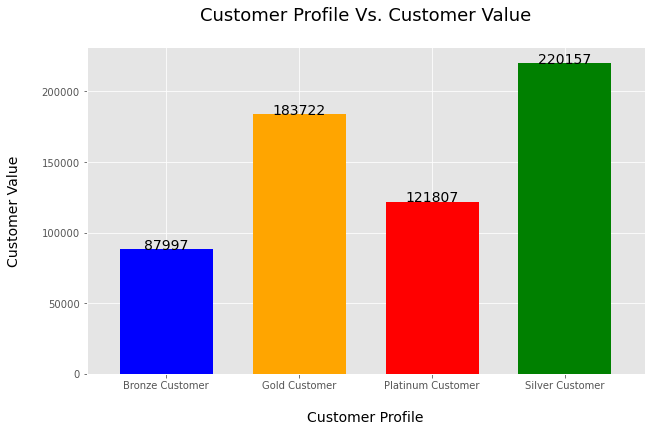

In [188]:
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title("Customer Profile Vs. Customer Value\n", fontsize=18)
rfmTable.groupby(["Customer_Profile"])["RFM_Value"].sum().plot(kind="bar", width=0.7, color=["blue","orange","red","green"])
plt.xlabel("\nCustomer Profile", fontsize=14,color="black")
plt.ylabel("Customer Value\n",fontsize=14, color="black")

label = df_customerprofile.values
for i in range(4):
    plt.text(x = i, y = label[i], s = label[i],horizontalalignment='center',rotation = 360, color = "black", fontsize=14)

plt.xticks(rotation=0)    

    
plt.show()

**The above bar graph implies that -** 
 - `**Platinum Customer**` has a good range of customers.
 - `**Platinum Customer**` has high customer value as compared to other customer profiles.
 
-----------------------------------------------------------------------------------------------------------------------------

### Age Cluster to shows which wealth segment brings more profit on the tabel

In [189]:
res1 = pd.pivot_table(data=transactions_exsistingcustomer, index="age_group", columns="wealth_segment", values="profit",aggfunc=np.sum)
res1

wealth_segment,Affluent Customer,High Net Worth,Mass Customer
age_group,,,
<30,388383.38,313592.29,654768.87
30-40,327968.11,363056.92,659579.90
40-50,616879.42,659182.23,1322829.27
50-60,325388.84,351247.08,665007.50
60+,226416.93,205958.60,444950.96


In [190]:
res1["Affluent Customer"] = res1["Affluent Customer"].astype(int)
res1["High Net Worth"] = res1["High Net Worth"].astype(int)
res1["Mass Customer"] = res1["Mass Customer"].astype(int)

In [191]:
res1

wealth_segment,Affluent Customer,High Net Worth,Mass Customer
age_group,,,
<30,388383,313592,654768
30-40,327968,363056,659579
40-50,616879,659182,1322829
50-60,325388,351247,665007
60+,226416,205958,444950


In [200]:
res1.to_csv("res1.csv")

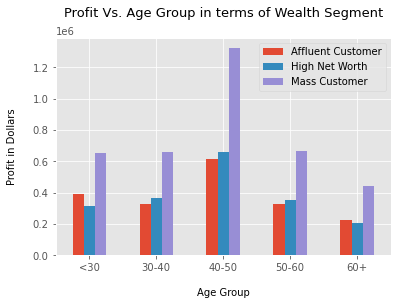

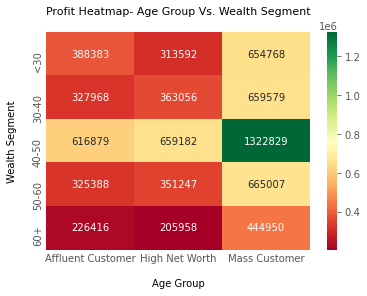

In [193]:
pd.pivot_table(data=transactions_exsistingcustomer, index="age_group", columns="wealth_segment", values="profit",aggfunc=np.sum).plot(kind='bar')
plt.title("Profit Vs. Age Group in terms of Wealth Segment\n", fontsize=13)
plt.xlabel("\nAge Group", fontsize=10,color="black")
plt.ylabel("Profit in Dollars\n",fontsize=10, color="black")
plt.legend(loc='upper right',fontsize=10)
plt.xticks(rotation=0)

plt.figure(figsize=[13,4])
plt.subplot(1,2,1)

plt.title("Profit Heatmap- Age Group Vs. Wealth Segment\n", fontsize=11)
ax = sns.heatmap(res1, annot=True, cmap="RdYlGn", fmt='d')
ax.tick_params(axis='both', which='both', length=0)
plt.xlabel("\nAge Group", fontsize=10,color="black")
plt.ylabel("Wealth Segment\n",fontsize=10,color="black")
plt.show()

plt.show()

**From the above heatmap and bar graph**

- Age Group `**40-50**` giving the highest profit.
  - Based on that the wealth segment `**Mass Customers**` has overall performance better.
  
------------------------------------------------------------------------------------------------------------------------------
  

### Find number of cars owned as per the location

In [194]:
transactions_exsistingcustomer.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'profit', 'gender',
       'past_3_years_bike_related_purchases', 'age', 'age_group', 'job_title',
       'job_industry_category', 'wealth_segment', 'owns_car', 'postcode',
       'state', 'property_valuation', 'country', 'recency'],
      dtype='object')

In [195]:
transactions_exsistingcustomer["owns_car"].value_counts()

Yes    6901
No     6723
Name: owns_car, dtype: int64

In [199]:
transactions_exsistingcustomer.to_csv("transactions_exsistingcustomer.csv")

In [196]:
transactions_exsistingcustomer["owns_car_flag"]=np.where(transactions_exsistingcustomer["owns_car"]=="Yes",1,0)

In [197]:
transactions_exsistingcustomer.groupby(["state","owns_car"])["owns_car_flag"].count()

state            owns_car
New South Wales  No          3531
                 Yes         3680
QLD              No          1479
                 Yes         1522
Victoria         No          1713
                 Yes         1699
Name: owns_car_flag, dtype: int64

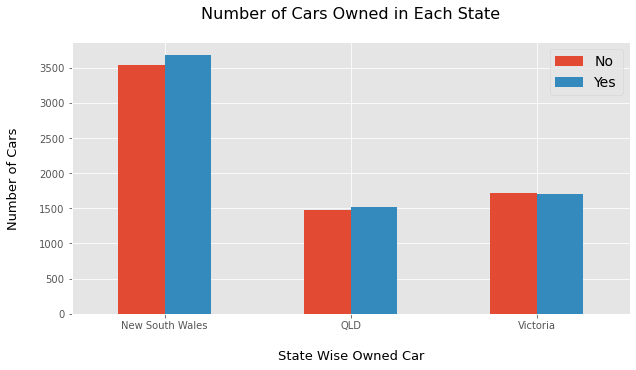

In [226]:
pd.pivot_table(data=transactions_exsistingcustomer, index="state", columns="owns_car", values="owns_car_flag",aggfunc='count').plot(kind='bar',figsize=[10,5])
plt.title("Number of Cars Owned in Each State\n", fontsize=16)
plt.xlabel("\nState Wise Owned Car", fontsize=13,color="black")
plt.ylabel("Number of Cars\n",fontsize=13, color="black")
plt.legend(loc='upper right',fontsize=14)
plt.xticks(rotation=0)

plt.show()

**From the above bar graph implies**
 - `New South Wales` holds high number of owned cars as compared to other states of Australia.
 
-------------------------------------------------------------------------------------------------------------------------------

## Find total bikes purchased by each customer based on his/her job_industry

In [201]:
transactions_exsistingcustomer.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'profit', 'gender',
       'past_3_years_bike_related_purchases', 'age', 'age_group', 'job_title',
       'job_industry_category', 'wealth_segment', 'owns_car', 'postcode',
       'state', 'property_valuation', 'country', 'recency', 'owns_car_flag'],
      dtype='object')

In [202]:
transactions_exsistingcustomer.groupby("job_industry_category")["past_3_years_bike_related_purchases"].count()

job_industry_category
Argiculture            482
Entertainment          586
Financial Services    3228
Health                2653
IT                     574
Manufacturing         3322
Property              1087
Retail                1407
Telecommunications     285
Name: past_3_years_bike_related_purchases, dtype: int64

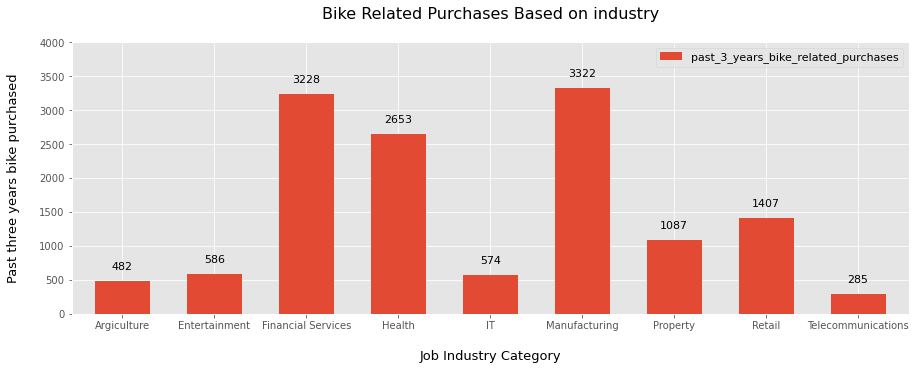

In [203]:
transactions_exsistingcustomer.groupby("job_industry_category")["past_3_years_bike_related_purchases"].count().plot(kind='bar',figsize=[15,5], width=0.6)
plt.title("Bike Related Purchases Based on industry\n", fontsize=16)
plt.xlabel("\nJob Industry Category", fontsize=13,color="black")
plt.ylabel("Past three years bike purchased\n",fontsize=13, color="black")
plt.xticks(rotation=0)
plt.yticks(np.arange(0,4500,500))

plt.legend(loc='upper right',fontsize=11)

label = transactions_exsistingcustomer.groupby("job_industry_category")["past_3_years_bike_related_purchases"].count()
for i in range(9):
    plt.text(x = i, y = label[i], s = str("\n"+str(int(label[i]))+"\n"),horizontalalignment='center',rotation = 360, color = "black", fontsize=11)


plt.show()

**From the bar graph**
 - Industry like - `**Manufacturing & Financial Services**` holds a high record in terms of bike purchased in last 3 years.
 
-------------------------------------------------------------------------------------------------------------------------------

## Find which industry sector brings up the highest profit on the tabel

In [204]:
transactions_exsistingcustomer.groupby("job_industry_category")["profit"].sum().round()

job_industry_category
Argiculture            255213.0
Entertainment          326459.0
Financial Services    1840374.0
Health                1429215.0
IT                     313201.0
Manufacturing         1810040.0
Property               596263.0
Retail                 798193.0
Telecommunications     156251.0
Name: profit, dtype: float64

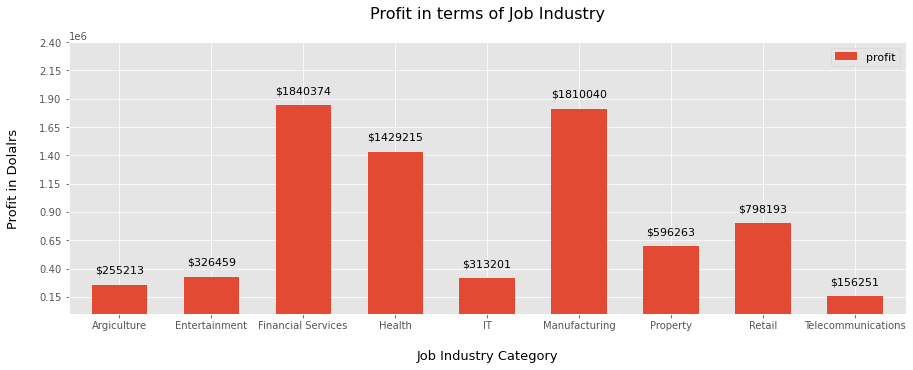

In [205]:
transactions_exsistingcustomer.groupby("job_industry_category")["profit"].sum().plot(kind='bar',figsize=[15,5], width=0.6)
plt.title("Profit in terms of Job Industry\n", fontsize=16)
plt.xlabel("\nJob Industry Category", fontsize=13,color="black")
plt.ylabel("Profit in Dolalrs\n",fontsize=13, color="black")
plt.xticks(rotation=0)
plt.yticks(np.arange(150000,2500000,250000))
plt.legend(loc='upper right',fontsize=11)

label = transactions_exsistingcustomer.groupby("job_industry_category")["profit"].sum().round()
for i in range(9):
    plt.text(x = i, y = label[i], s = str("\n"+"$"+str(int(label[i]))+"\n"),horizontalalignment='center',rotation = 360, color = "black", fontsize=11)

plt.show()

**From the bar graph**
 - Industry like - `**Manufacturing & Financial Services**` holds high profit.
 
-------------------------------------------------------------------------------------------------------------------------------

## Find the past 3 years bike purachsed on the bases of gender and age group

In [206]:
pd.pivot_table(data=transactions_exsistingcustomer, index="gender", columns="age_group", values="past_3_years_bike_related_purchases",aggfunc='count')


age_group,<30,30-40,40-50,50-60,60+
gender,,,,,
Female,1218,1215,2494,1219,812
Male,1254,1175,2267,1155,815


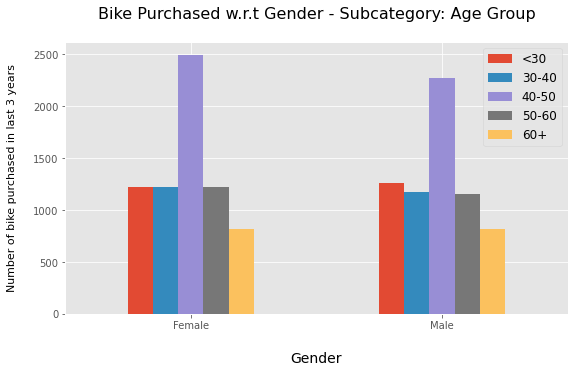

In [207]:
pd.pivot_table(data=transactions_exsistingcustomer, index="gender", columns="age_group", values="past_3_years_bike_related_purchases",aggfunc='count').plot(kind='bar',figsize=[9,5])

plt.title("Bike Purchased w.r.t Gender - Subcategory: Age Group\n", fontsize=16)
plt.xlabel("\nGender", fontsize=14,color="black")
plt.ylabel("Number of bike purchased in last 3 years\n",fontsize=11, color="black")
plt.legend(loc='upper right',fontsize=12)
plt.xticks(rotation=0)

plt.show()

**From the above bar graph**
 - Age group `**40-50**` has high count in terms of bike purchased in last 3 years within that Female ratio a bit higher.
 
 
-------------------------------------------------------------------------------------------------------------------------------


## Data Frame of Only High Value Customers

In [208]:
transactions_exsistingcustomer.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'profit', 'gender',
       'past_3_years_bike_related_purchases', 'age', 'age_group', 'job_title',
       'job_industry_category', 'wealth_segment', 'owns_car', 'postcode',
       'state', 'property_valuation', 'country', 'recency', 'owns_car_flag'],
      dtype='object')

In [209]:
df1 = transactions_exsistingcustomer[transactions_exsistingcustomer["age_group"]=="40-50"]
df1

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,job_title,job_industry_category,wealth_segment,owns_car,postcode,state,property_valuation,country,recency,owns_car_flag
0,253,2,3123,2017-12-30,False,Approved,Giant Bicycles,Road,low,small,...,Dental Hygienist,Health,High Net Worth,No,2195.0,New South Wales,6.0,Australia,0,0
7,2074,12,675,2017-12-30,True,Approved,WeareA2B,Standard,medium,medium,...,Administrative Assistant I,Financial Services,Mass Customer,Yes,2048.0,New South Wales,12.0,Australia,0,1
11,3254,75,1000,2017-12-30,False,Approved,Giant Bicycles,Touring,medium,large,...,Compensation Analyst,Financial Services,Mass Customer,No,3136.0,Victoria,9.0,Australia,0,0
12,3938,95,993,2017-12-30,False,Approved,OHM Cycles,Touring,low,medium,...,Account Coordinator,Argiculture,High Net Worth,No,2871.0,New South Wales,3.0,Australia,0,0
21,7547,23,1407,2017-12-30,True,Approved,Norco Bicycles,Mountain,low,small,...,Structural Analysis Engineer,Manufacturing,Mass Customer,Yes,3015.0,Victoria,10.0,Australia,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19430,13934,94,824,2017-01-01,False,Approved,Giant Bicycles,Standard,medium,large,...,Financial Advisor,Financial Services,Affluent Customer,Yes,4127.0,QLD,3.0,Australia,363,1
19435,16398,43,2160,2017-01-01,True,Approved,Solex,Standard,medium,medium,...,Recruiter,Health,Mass Customer,Yes,3172.0,Victoria,8.0,Australia,363,1
19438,17839,57,642,2017-01-01,False,Approved,WeareA2B,Touring,medium,large,...,Automation Specialist IV,Property,Mass Customer,No,4218.0,QLD,8.0,Australia,363,0
19439,17907,63,1852,2017-01-01,True,Cancelled,Solex,Standard,medium,medium,...,Research Associate,Manufacturing,Affluent Customer,No,3029.0,Victoria,6.0,Australia,363,0


In [210]:
df2 = df1[df1["wealth_segment"]=="Mass Customer"]
df2

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,job_title,job_industry_category,wealth_segment,owns_car,postcode,state,property_valuation,country,recency,owns_car_flag
7,2074,12,675,2017-12-30,True,Approved,WeareA2B,Standard,medium,medium,...,Administrative Assistant I,Financial Services,Mass Customer,Yes,2048.0,New South Wales,12.0,Australia,0,1
11,3254,75,1000,2017-12-30,False,Approved,Giant Bicycles,Touring,medium,large,...,Compensation Analyst,Financial Services,Mass Customer,No,3136.0,Victoria,9.0,Australia,0,0
21,7547,23,1407,2017-12-30,True,Approved,Norco Bicycles,Mountain,low,small,...,Structural Analysis Engineer,Manufacturing,Mass Customer,Yes,3015.0,Victoria,10.0,Australia,0,1
34,15757,30,3130,2017-12-30,False,Approved,Solex,Standard,high,medium,...,VP Product Management,Telecommunications,Mass Customer,No,4503.0,QLD,4.0,Australia,0,0
49,4066,81,886,2017-12-29,False,Approved,Norco Bicycles,Standard,medium,small,...,Accounting Assistant III,Health,Mass Customer,No,2065.0,New South Wales,10.0,Australia,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19371,10000,1,97,2017-01-02,False,Approved,Giant Bicycles,Standard,medium,medium,...,Community Outreach Specialist,Financial Services,Mass Customer,Yes,2766.0,New South Wales,8.0,Australia,362,1
19377,14137,3,1285,2017-01-02,True,Approved,Trek Bicycles,Standard,medium,large,...,Office Assistant III,Manufacturing,Mass Customer,Yes,4306.0,QLD,6.0,Australia,362,1
19427,12782,71,1762,2017-01-01,False,Approved,Solex,Standard,high,large,...,Research Assistant II,Health,Mass Customer,Yes,3039.0,Victoria,9.0,Australia,363,1
19435,16398,43,2160,2017-01-01,True,Approved,Solex,Standard,medium,medium,...,Recruiter,Health,Mass Customer,Yes,3172.0,Victoria,8.0,Australia,363,1


In [211]:
FS = df2[df2["job_industry_category"] == "Financial Services"]
FS

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,job_title,job_industry_category,wealth_segment,owns_car,postcode,state,property_valuation,country,recency,owns_car_flag
7,2074,12,675,2017-12-30,True,Approved,WeareA2B,Standard,medium,medium,...,Administrative Assistant I,Financial Services,Mass Customer,Yes,2048.0,New South Wales,12.0,Australia,0,1
11,3254,75,1000,2017-12-30,False,Approved,Giant Bicycles,Touring,medium,large,...,Compensation Analyst,Financial Services,Mass Customer,No,3136.0,Victoria,9.0,Australia,0,0
53,6344,49,1629,2017-12-29,True,Approved,Trek Bicycles,Road,medium,medium,...,VP Accounting,Financial Services,Mass Customer,No,4413.0,QLD,5.0,Australia,1,0
89,18659,34,322,2017-12-29,True,Approved,Norco Bicycles,Road,high,large,...,Research Associate,Financial Services,Mass Customer,Yes,4350.0,QLD,6.0,Australia,1,1
136,12214,94,2168,2017-12-28,False,Approved,Giant Bicycles,Standard,medium,large,...,VP Accounting,Financial Services,Mass Customer,Yes,4061.0,QLD,5.0,Australia,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19299,1155,16,127,2017-01-03,True,Approved,Norco Bicycles,Standard,high,small,...,Compensation Analyst,Financial Services,Mass Customer,No,4405.0,QLD,1.0,Australia,361,0
19302,3589,85,2586,2017-01-03,True,Approved,WeareA2B,Standard,medium,medium,...,Tax Accountant,Financial Services,Mass Customer,Yes,2032.0,New South Wales,8.0,Australia,361,1
19337,16184,81,2861,2017-01-03,True,Approved,Norco Bicycles,Standard,medium,small,...,VP Quality Control,Financial Services,Mass Customer,Yes,4154.0,QLD,9.0,Australia,361,1
19358,5168,36,580,2017-01-02,True,Approved,Solex,Standard,low,medium,...,Compensation Analyst,Financial Services,Mass Customer,Yes,2287.0,New South Wales,7.0,Australia,362,1


In [212]:
M = df2[df2["job_industry_category"] == "Manufacturing"]
M

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,job_title,job_industry_category,wealth_segment,owns_car,postcode,state,property_valuation,country,recency,owns_car_flag
21,7547,23,1407,2017-12-30,True,Approved,Norco Bicycles,Mountain,low,small,...,Structural Analysis Engineer,Manufacturing,Mass Customer,Yes,3015.0,Victoria,10.0,Australia,0,1
148,17574,34,605,2017-12-28,False,Approved,Norco Bicycles,Road,high,large,...,Electrical Engineer,Manufacturing,Mass Customer,Yes,2761.0,New South Wales,8.0,Australia,2,1
161,3671,91,3007,2017-12-27,False,Approved,Solex,Standard,medium,medium,...,Environmental Tech,Manufacturing,Mass Customer,No,2478.0,New South Wales,10.0,Australia,3,0
213,5447,19,3275,2017-12-26,True,Approved,OHM Cycles,Road,high,large,...,Computer Systems Analyst IV,Manufacturing,Mass Customer,No,2074.0,New South Wales,11.0,Australia,4,0
223,10476,10,2695,2017-12-26,False,Approved,WeareA2B,Touring,medium,medium,...,Statistician II,Manufacturing,Mass Customer,Yes,2068.0,New South Wales,12.0,Australia,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19198,7560,44,1482,2017-01-05,True,Approved,WeareA2B,Standard,medium,medium,...,Electrical Engineer,Manufacturing,Mass Customer,No,2428.0,New South Wales,8.0,Australia,359,0
19286,18484,17,1848,2017-01-04,False,Approved,Solex,Standard,high,medium,...,Information Systems Manager,Manufacturing,Mass Customer,No,2474.0,New South Wales,3.0,Australia,360,0
19314,8147,90,2481,2017-01-03,False,Approved,Norco Bicycles,Standard,low,medium,...,Chief Design Engineer,Manufacturing,Mass Customer,Yes,3023.0,Victoria,7.0,Australia,361,1
19369,9061,94,2796,2017-01-02,True,Approved,Giant Bicycles,Standard,medium,large,...,Web Designer II,Manufacturing,Mass Customer,No,2343.0,New South Wales,2.0,Australia,362,0


In [213]:
H = df2[df2["job_industry_category"] == "Health"]
H

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,job_title,job_industry_category,wealth_segment,owns_car,postcode,state,property_valuation,country,recency,owns_car_flag
49,4066,81,886,2017-12-29,False,Approved,Norco Bicycles,Standard,medium,small,...,Accounting Assistant III,Health,Mass Customer,No,2065.0,New South Wales,10.0,Australia,1,0
72,14491,90,1530,2017-12-29,True,Approved,Norco Bicycles,Standard,low,medium,...,Pharmacist,Health,Mass Customer,Yes,2767.0,New South Wales,8.0,Australia,1,1
102,1561,46,1545,2017-12-28,True,Approved,Solex,Standard,low,medium,...,Associate Professor,Health,Mass Customer,Yes,3196.0,Victoria,10.0,Australia,2,1
107,2934,57,673,2017-12-28,False,Approved,WeareA2B,Touring,medium,large,...,VP Sales,Health,Mass Customer,Yes,2304.0,New South Wales,7.0,Australia,2,1
121,7169,44,2961,2017-12-28,False,Approved,WeareA2B,Standard,medium,medium,...,Assistant Manager,Health,Mass Customer,Yes,3031.0,Victoria,8.0,Australia,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19285,18284,49,1154,2017-01-04,False,Approved,Trek Bicycles,Road,medium,medium,...,Research Nurse,Health,Mass Customer,Yes,2222.0,New South Wales,11.0,Australia,360,1
19288,19522,4,192,2017-01-04,False,Approved,Giant Bicycles,Standard,high,medium,...,Junior Executive,Health,Mass Customer,Yes,3196.0,Victoria,6.0,Australia,360,1
19347,514,57,1679,2017-01-02,True,Approved,WeareA2B,Touring,medium,large,...,Programmer II,Health,Mass Customer,Yes,2063.0,New South Wales,11.0,Australia,362,1
19427,12782,71,1762,2017-01-01,False,Approved,Solex,Standard,high,large,...,Research Assistant II,Health,Mass Customer,Yes,3039.0,Victoria,9.0,Australia,363,1


In [214]:
FS = pd.concat([FS, M], ignore_index=True, sort=False)
FS

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,job_title,job_industry_category,wealth_segment,owns_car,postcode,state,property_valuation,country,recency,owns_car_flag
0,2074,12,675,2017-12-30,True,Approved,WeareA2B,Standard,medium,medium,...,Administrative Assistant I,Financial Services,Mass Customer,Yes,2048.0,New South Wales,12.0,Australia,0,1
1,3254,75,1000,2017-12-30,False,Approved,Giant Bicycles,Touring,medium,large,...,Compensation Analyst,Financial Services,Mass Customer,No,3136.0,Victoria,9.0,Australia,0,0
2,6344,49,1629,2017-12-29,True,Approved,Trek Bicycles,Road,medium,medium,...,VP Accounting,Financial Services,Mass Customer,No,4413.0,QLD,5.0,Australia,1,0
3,18659,34,322,2017-12-29,True,Approved,Norco Bicycles,Road,high,large,...,Research Associate,Financial Services,Mass Customer,Yes,4350.0,QLD,6.0,Australia,1,1
4,12214,94,2168,2017-12-28,False,Approved,Giant Bicycles,Standard,medium,large,...,VP Accounting,Financial Services,Mass Customer,Yes,4061.0,QLD,5.0,Australia,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1085,7560,44,1482,2017-01-05,True,Approved,WeareA2B,Standard,medium,medium,...,Electrical Engineer,Manufacturing,Mass Customer,No,2428.0,New South Wales,8.0,Australia,359,0
1086,18484,17,1848,2017-01-04,False,Approved,Solex,Standard,high,medium,...,Information Systems Manager,Manufacturing,Mass Customer,No,2474.0,New South Wales,3.0,Australia,360,0
1087,8147,90,2481,2017-01-03,False,Approved,Norco Bicycles,Standard,low,medium,...,Chief Design Engineer,Manufacturing,Mass Customer,Yes,3023.0,Victoria,7.0,Australia,361,1
1088,9061,94,2796,2017-01-02,True,Approved,Giant Bicycles,Standard,medium,large,...,Web Designer II,Manufacturing,Mass Customer,No,2343.0,New South Wales,2.0,Australia,362,0


In [215]:
FS = pd.concat([FS, H], ignore_index=True, sort=False)
FMH = FS
df_highvalue_customers = FMH

df_highvalue_customers

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,job_title,job_industry_category,wealth_segment,owns_car,postcode,state,property_valuation,country,recency,owns_car_flag
0,2074,12,675,2017-12-30,True,Approved,WeareA2B,Standard,medium,medium,...,Administrative Assistant I,Financial Services,Mass Customer,Yes,2048.0,New South Wales,12.0,Australia,0,1
1,3254,75,1000,2017-12-30,False,Approved,Giant Bicycles,Touring,medium,large,...,Compensation Analyst,Financial Services,Mass Customer,No,3136.0,Victoria,9.0,Australia,0,0
2,6344,49,1629,2017-12-29,True,Approved,Trek Bicycles,Road,medium,medium,...,VP Accounting,Financial Services,Mass Customer,No,4413.0,QLD,5.0,Australia,1,0
3,18659,34,322,2017-12-29,True,Approved,Norco Bicycles,Road,high,large,...,Research Associate,Financial Services,Mass Customer,Yes,4350.0,QLD,6.0,Australia,1,1
4,12214,94,2168,2017-12-28,False,Approved,Giant Bicycles,Standard,medium,large,...,VP Accounting,Financial Services,Mass Customer,Yes,4061.0,QLD,5.0,Australia,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1663,18284,49,1154,2017-01-04,False,Approved,Trek Bicycles,Road,medium,medium,...,Research Nurse,Health,Mass Customer,Yes,2222.0,New South Wales,11.0,Australia,360,1
1664,19522,4,192,2017-01-04,False,Approved,Giant Bicycles,Standard,high,medium,...,Junior Executive,Health,Mass Customer,Yes,3196.0,Victoria,6.0,Australia,360,1
1665,514,57,1679,2017-01-02,True,Approved,WeareA2B,Touring,medium,large,...,Programmer II,Health,Mass Customer,Yes,2063.0,New South Wales,11.0,Australia,362,1
1666,12782,71,1762,2017-01-01,False,Approved,Solex,Standard,high,large,...,Research Assistant II,Health,Mass Customer,Yes,3039.0,Victoria,9.0,Australia,363,1


**----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

-------------------------------------------------------------------------------`**End Of Note Book**`----------------------------------------------------------------------------------------------

**----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

#### Export Pandas DataFrame to a CSV file

In [216]:
transactions_exsistingcustomer.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'profit', 'gender',
       'past_3_years_bike_related_purchases', 'age', 'age_group', 'job_title',
       'job_industry_category', 'wealth_segment', 'owns_car', 'postcode',
       'state', 'property_valuation', 'country', 'recency', 'owns_car_flag'],
      dtype='object')

In [218]:
transactions_exsistingcustomer.to_csv(r"C:\Users\OlamiTayo\Documents\Data Analyst\Virtual Internship\KPMG-Virtual-Internship-main\KPMG-Virtual-Internship-main\Exsisting_Customers_Transactions.csv", 
                                      header=["transaction_id", "product_id", "customer_id","transaction_date","online_order", 
                                              "order_status","brand","product_line","product_class","product_size", 
                                              "list_price","standard_cost","product_first_sold_date","profit","gender","past_3_years_bike_related_purchases", 
                                             "age","age_group","job_title","job_industry_category","wealth_segment","owns_car","postcode","state", 
                                             "property_valuation","country","recency","owns_car_flag"], index=False)

In [219]:
df_highvalue_customers.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'profit', 'gender',
       'past_3_years_bike_related_purchases', 'age', 'age_group', 'job_title',
       'job_industry_category', 'wealth_segment', 'owns_car', 'postcode',
       'state', 'property_valuation', 'country', 'recency', 'owns_car_flag'],
      dtype='object')

In [220]:
df_highvalue_customers.to_csv(r"C:\Users\OlamiTayo\Documents\Data Analyst\Virtual Internship\KPMG-Virtual-Internship-main\KPMG-Virtual-Internship-main\High_Value_Customers.csv", 
                                      header=["transaction_id", "product_id", "customer_id","transaction_date","online_order", 
                                              "order_status","brand","product_line","product_class","product_size", 
                                              "list_price","standard_cost","product_first_sold_date","profit","gender","past_3_years_bike_related_purchases", 
                                             "age","age_group","job_title","job_industry_category","wealth_segment","owns_car","postcode","state", 
                                             "property_valuation","country","recency","owns_car_flag"], index=False)